In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [403]:
df = pd.read_csv("bank.csv", sep= ";")

In [404]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


***Analisis exploratorio***

In [405]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [400]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [407]:
df.nunique().sort_values(ascending=True) 

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

***Visualizacion***

In [408]:
colores = ["aqua","indigo","red","lawngreen","gold","darksalmon","peru","linen", "tomato","palegreen","olive"]

Text(0.5, 1.0, 'Clientes que suscribieron pagos a plazos')

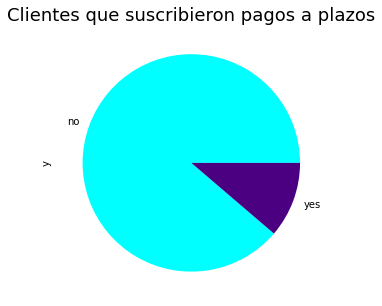

In [409]:
Grafico1 = df["y"].value_counts().plot(kind= "pie", colors= colores,  figsize=(15,5))
plt.title("Clientes que suscribieron pagos a plazos", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Profecciones de los clientes')

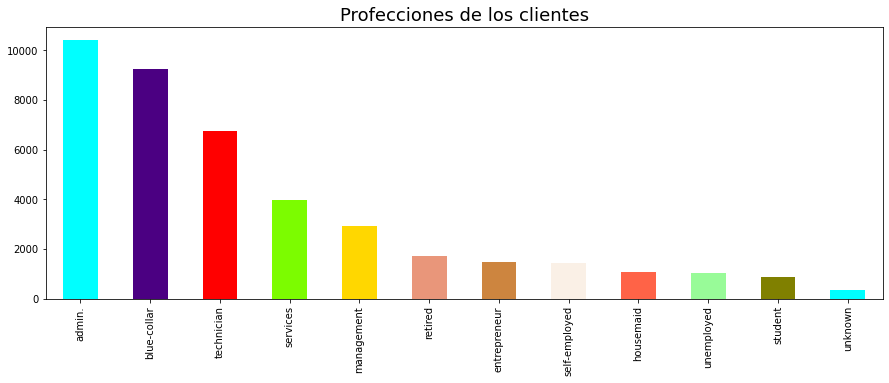

In [410]:
Grafico2 = df["job"].value_counts().plot(kind= "bar", color= colores, figsize=(15,5))
plt.title("Profecciones de los clientes", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Educacion de los clientes')

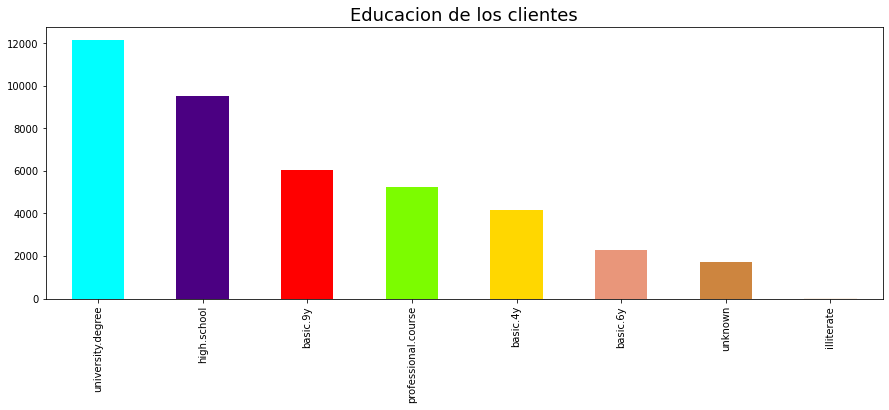

In [411]:
Graficoy = df["education"].value_counts().plot(kind= "bar", color=colores, figsize=(15,5))
plt.title("Educacion de los clientes", color = 'black',
                    size = 18) 


Text(0.5, 1.0, 'Resultado de la campaña de marketing anterior')

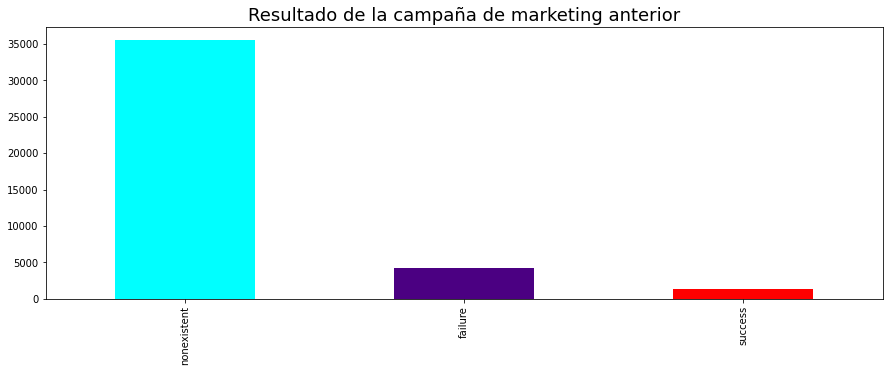

In [ ]:
Graficoy = df["poutcome"].value_counts().plot(kind= "bar", color=colores, figsize=(15,5))
plt.title("Resultado de la campaña de marketing anterior", color = 'black',
                    size = 18) 


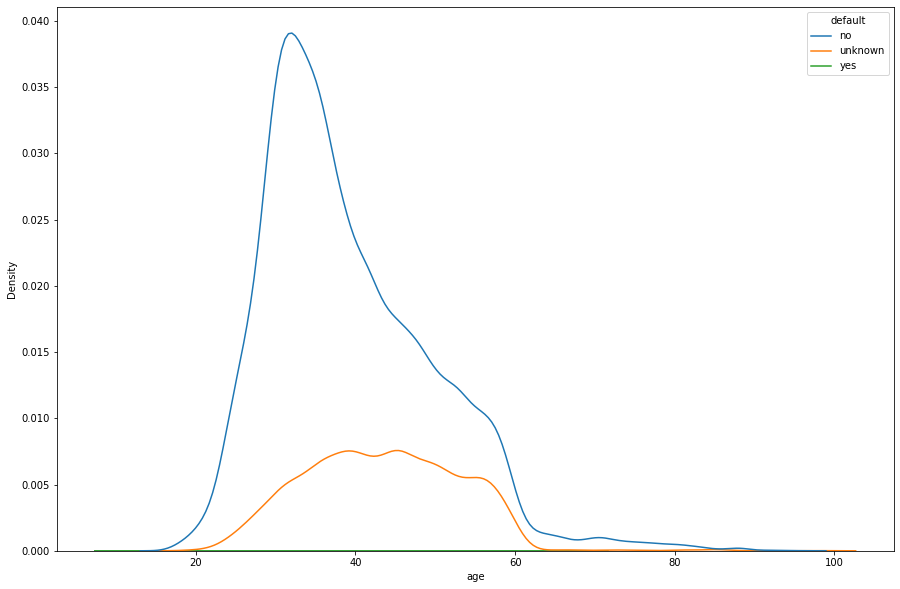

In [ ]:
plt.figure(figsize=(15,10))

sn.kdeplot(data=df, x="age", hue="default")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f56aa488730>,
      dtype=object)

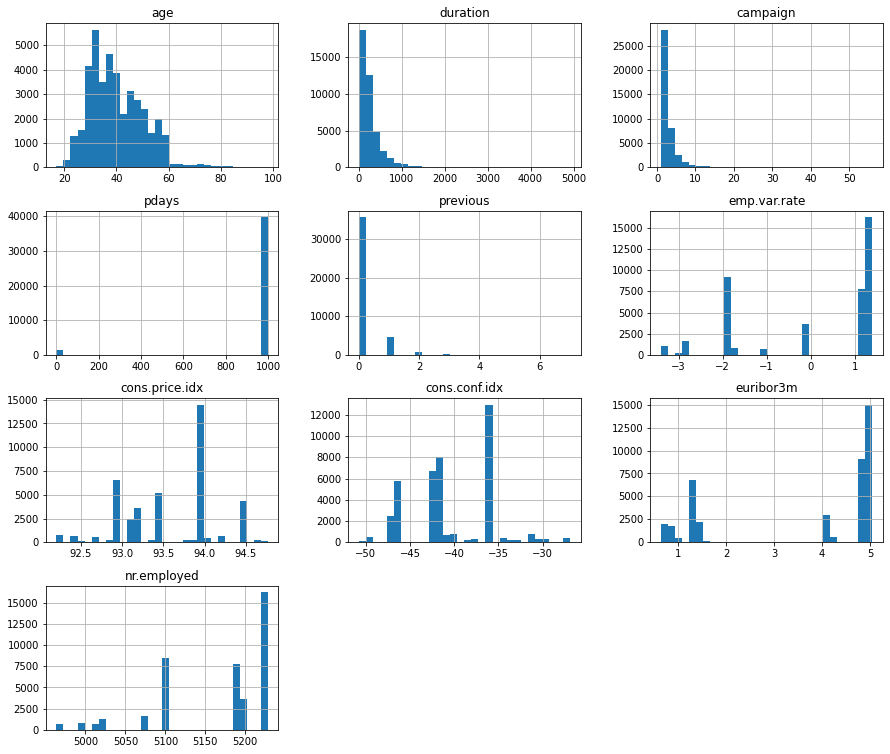

In [ ]:
df.hist(bins=30, figsize=(15,13))


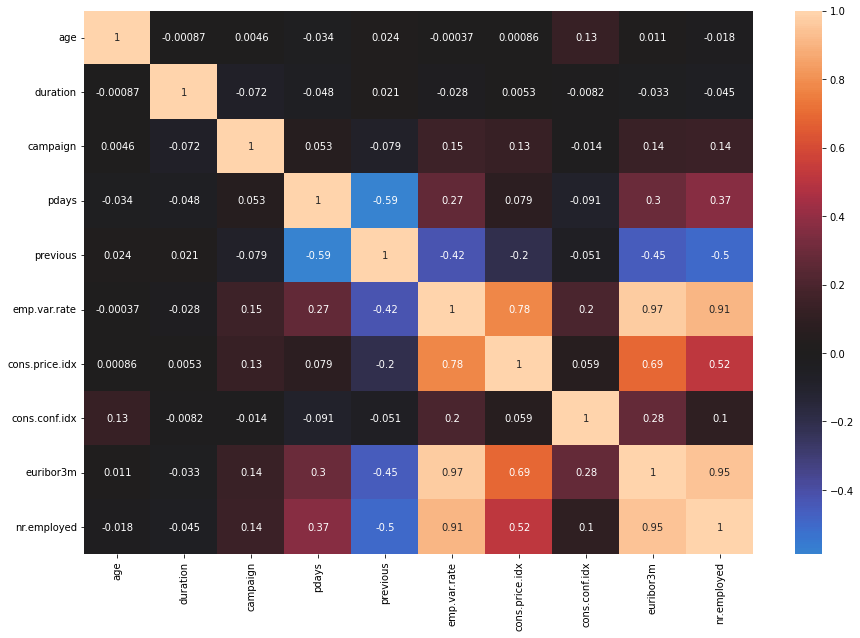

In [412]:
plt.figure(figsize=(15,10))
sn.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

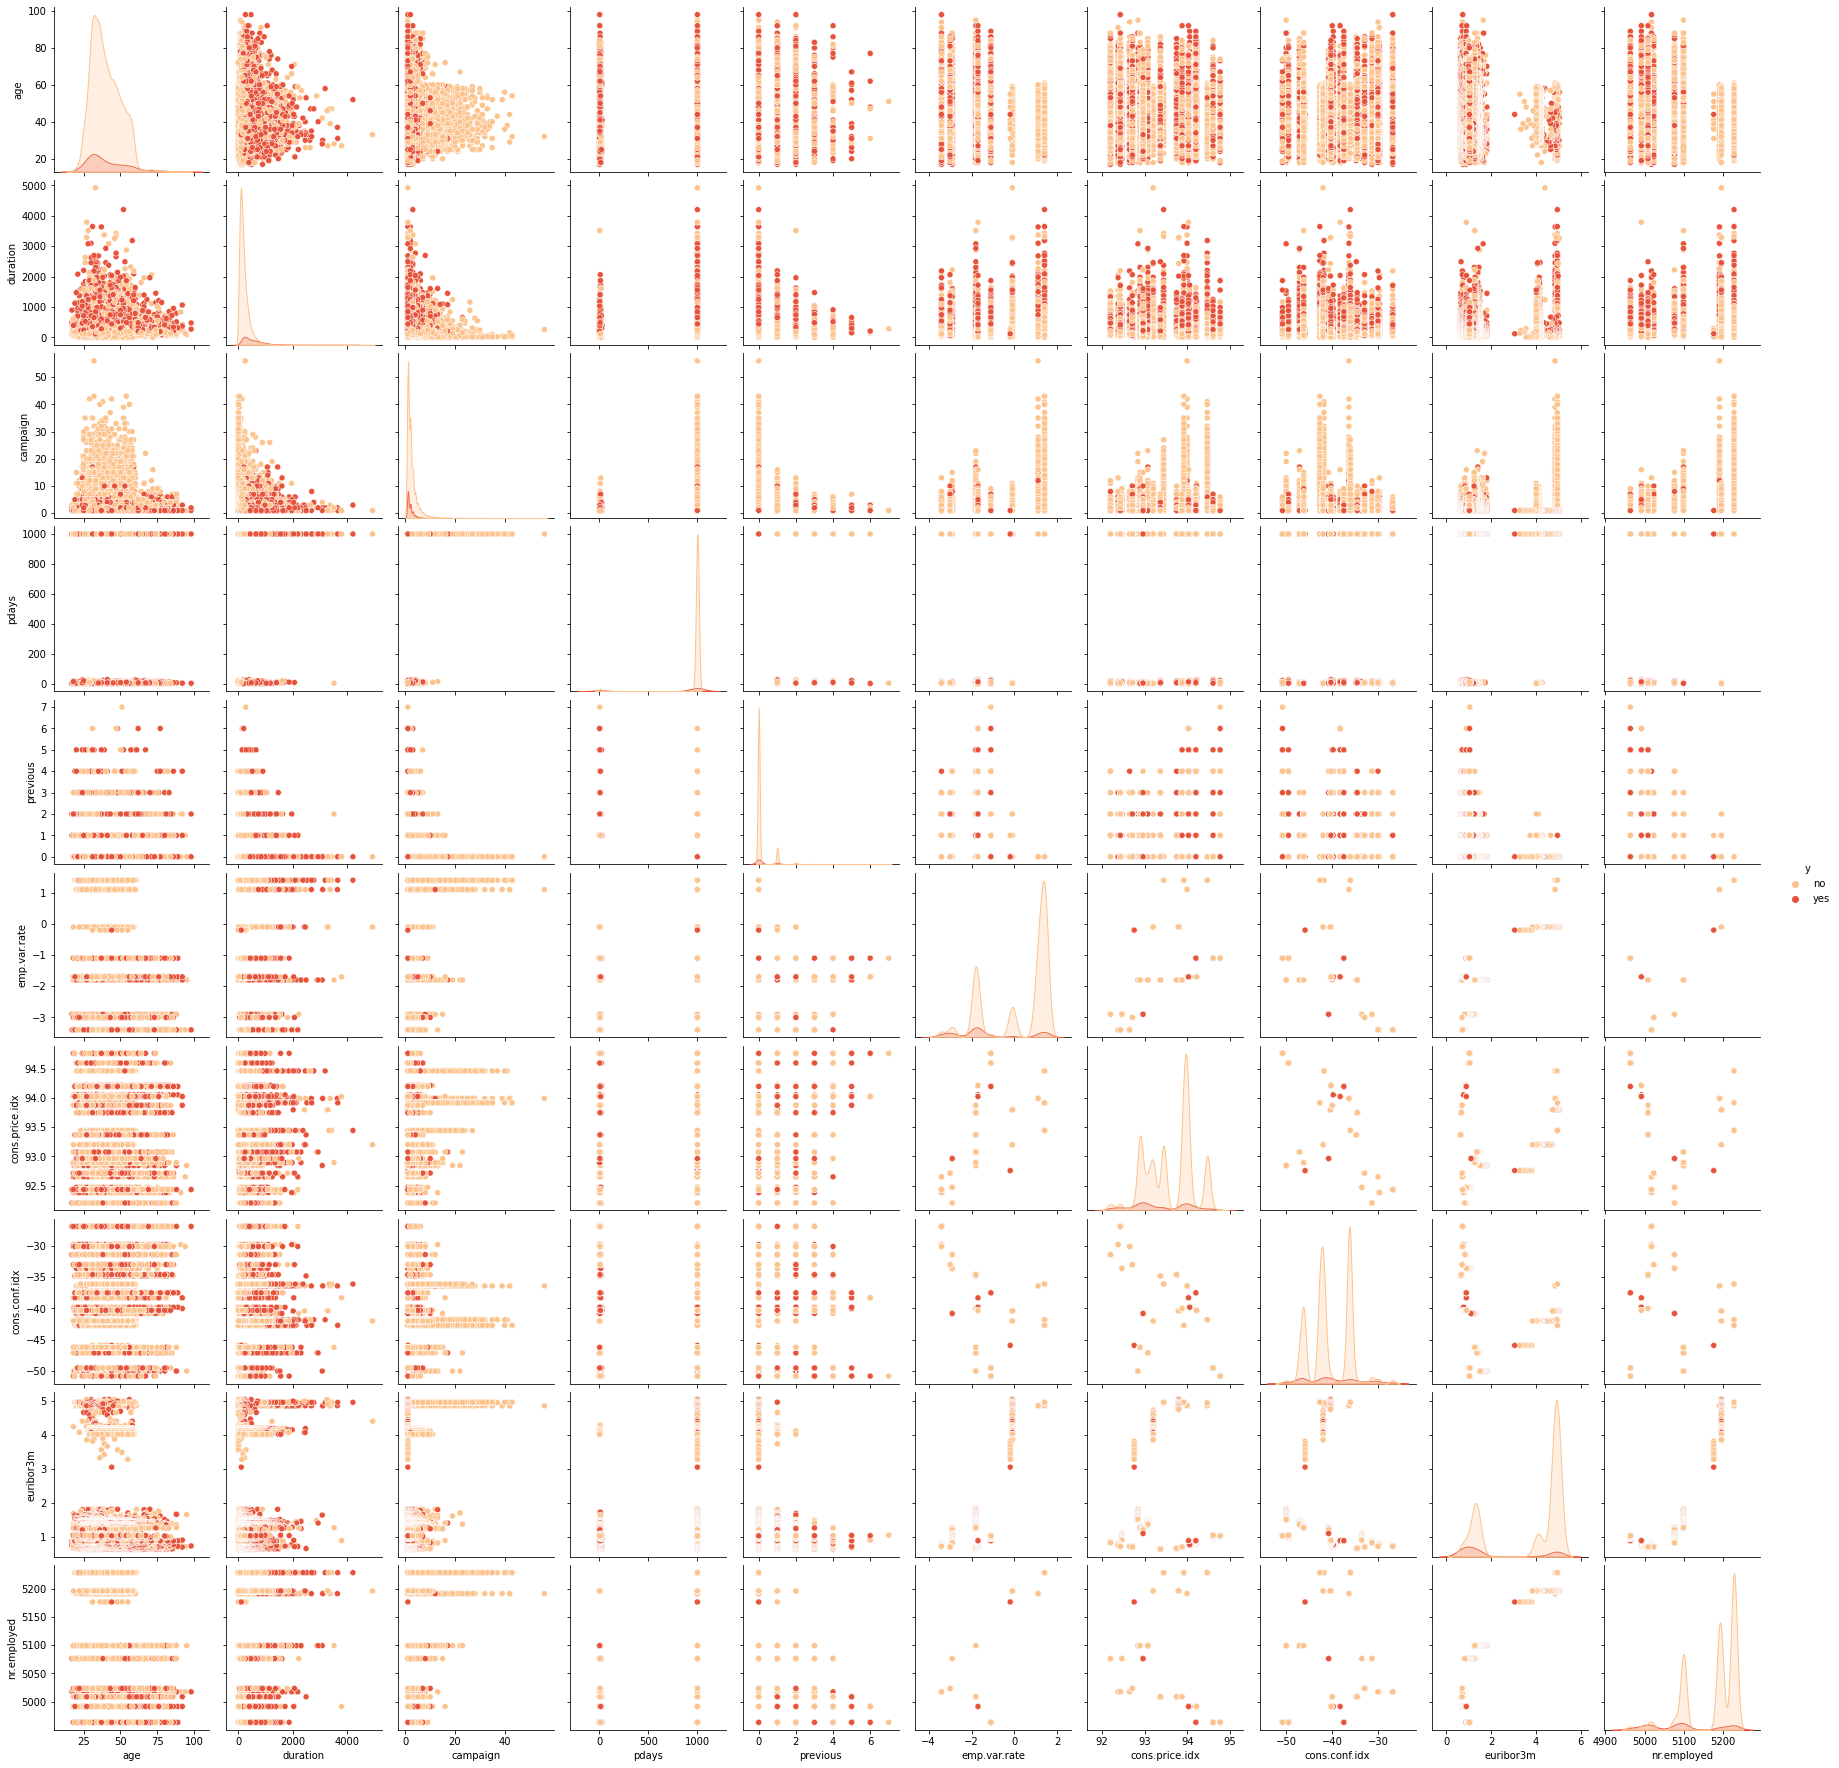

In [ ]:
sn.pairplot(df, hue = "y", palette="OrRd")

***Cambio de variables categoricas a numericas***

In [413]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [414]:
edu = {'basic.4y': 4, 'basic.6y':6,'basic.9y':9, 'high.school': 10, 'professional.course':11, 'university.degree':12, 'unknown':0, 'illiterate':0  }

In [415]:
df["education"] = df['education'].map(edu)

In [416]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [417]:
df["y"] = df["y"].map({"yes":1, "no": 0})  

In [418]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,4,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,10,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,10,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,6,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,10,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,11,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,11,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,12,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,11,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [419]:
df1=pd.get_dummies(df,drop_first=True)


In [420]:
df1

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,4,261,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,57,10,149,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
2,37,10,226,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
3,40,6,151,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
4,56,10,307,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,334,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41184,46,11,383,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41185,56,12,189,2,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0
41186,44,11,442,1,999,0,-1.1,94.767,-50.8,1.028,...,0,1,0,0,0,0,0,0,1,0


In [421]:
df1.columns

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [422]:
X= df1.drop(["y"],axis =1 )
y = df1["y"]

In [423]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,  test_size=0.25,
                                                      random_state=0)

***Balanceo de datos***

In [425]:

from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)



Text(0.5, 1.0, 'Variable de salida balancada')

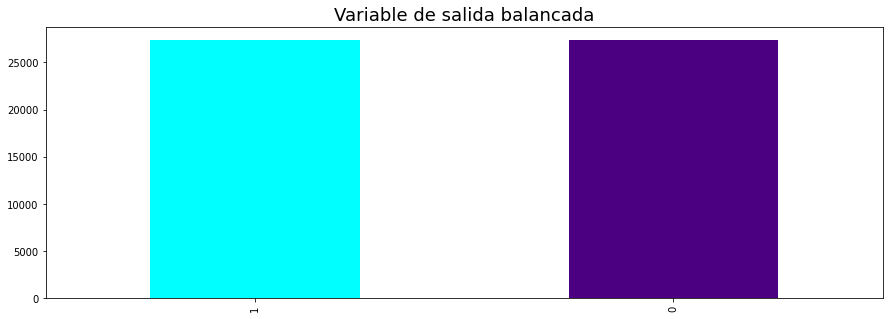

In [426]:
Grafic = y_train_res.value_counts().plot(kind= "bar", color= colores,  figsize=(15,5))
plt.title("Variable de salida balancada", color = 'black',
                    size = 18) 


In [427]:
from sklearn import preprocessing
scaler= preprocessing.StandardScaler()
X_train_res=scaler.fit_transform(X_train_res)
X_test=scaler.fit_transform(X_test)

In [428]:
X_train_res

array([[ 0.98346895,  0.18771094,  0.81071155, ...,  1.06031892,
        -1.06383828, -0.33881967],
       [-0.02435542, -0.12594931, -0.60569255, ...,  0.63337691,
        -1.06383828, -0.33881967],
       [-1.03217979,  0.81503145, -0.5527168 , ..., -0.42419641,
         0.93999249, -0.33881967],
       ...,
       [ 0.98346895,  0.81503145,  3.07472754, ...,  1.06031892,
        -1.06383828, -0.33881967],
       [ 0.3955714 ,  0.81503145,  0.82465253, ...,  0.63337691,
        -1.06383828, -0.33881967],
       [ 0.3955714 ,  0.81503145, -0.68933846, ..., -1.66129252,
         0.93999249,  2.95142247]])

***Desarrollo de algoritmos***

#***logistic Regression***

In [429]:
from sklearn.linear_model import LogisticRegression

In [430]:
lgcr=LogisticRegression()
lgcr.fit(X_train_res,y_train_res)

LogisticRegression()

In [431]:
y_pred=lgcr.predict(X_test)

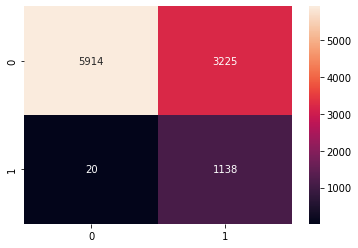

[[5914 3225]
 [  20 1138]]


In [432]:
matriz1 = confusion_matrix(y_test, y_pred) 
sn.color_palette('icefire')
sn.heatmap(matriz1, annot=True, fmt='d')
plt.show()
print(matriz1)

In [433]:
from sklearn.metrics import classification_report

reporte1 = classification_report(y_test, y_pred)
print(reporte1)

              precision    recall  f1-score   support

           0       1.00      0.65      0.78      9139
           1       0.26      0.98      0.41      1158

    accuracy                           0.68     10297
   macro avg       0.63      0.81      0.60     10297
weighted avg       0.91      0.68      0.74     10297



#***Naive bayes***

In [434]:
from sklearn.naive_bayes import GaussianNB
gaun = GaussianNB()

In [435]:

gaun = gaun.fit(X_train_res, y_train_res)

In [436]:

pregaun = gaun.predict(X_test)
pregaun

array([0, 1, 0, ..., 0, 0, 1])

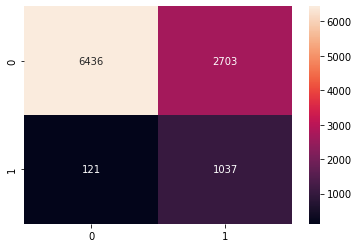

In [437]:
matrizgaun = confusion_matrix(y_test, pregaun) 
sn.color_palette('icefire')
sn.heatmap(matrizgaun, annot=True, fmt='d')
plt.show()

In [438]:
from sklearn.metrics import classification_report

reporte2 = classification_report(y_test, pregaun)
print(reporte2)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      9139
           1       0.28      0.90      0.42      1158

    accuracy                           0.73     10297
   macro avg       0.63      0.80      0.62     10297
weighted avg       0.90      0.73      0.78     10297



#***Decision tree classifier***

In [439]:

add = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [440]:
add.fit(X_train_res, y_train_res)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [387]:
predadd = add.predict(X_test)
predadd

array([0, 1, 0, ..., 0, 0, 0])

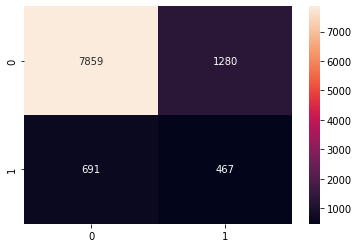

[[7859 1280]
 [ 691  467]]


In [441]:
matrizadd = confusion_matrix(y_test, predadd) 
sn.color_palette('icefire')
sn.heatmap(matrizadd, annot=True, fmt='d')
plt.show()
print(matrizadd)

In [442]:
report = classification_report(y_test, predadd)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9139
           1       0.27      0.40      0.32      1158

    accuracy                           0.81     10297
   macro avg       0.59      0.63      0.61     10297
weighted avg       0.85      0.81      0.82     10297



#***Random forest***

In [443]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [444]:
classifier.fit(X_train_res, y_train_res)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [445]:

classf = classifier.predict(X_test)
classf

array([0, 1, 0, ..., 0, 0, 1])

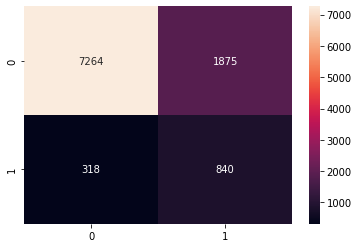

[[7264 1875]
 [ 318  840]]


In [446]:
matrizrf = confusion_matrix(y_test, classf) 
sn.color_palette('icefire')
sn.heatmap(matrizrf, annot=True, fmt='d')
plt.show()
print(matrizrf)

In [447]:
reportrf = classification_report(y_test, classf)
print(reportrf)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      9139
           1       0.31      0.73      0.43      1158

    accuracy                           0.79     10297
   macro avg       0.63      0.76      0.65     10297
weighted avg       0.89      0.79      0.82     10297

